In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv(r"C:\Users\braje\OneDrive\Desktop\corizo internship\major project\Red_wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [172]:
df.duplicated().sum()

239

In [173]:
df.drop_duplicates(inplace=True)

In [174]:
df.duplicated().sum()

0

In [175]:
df.shape

(1360, 12)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1360 non-null   float64
 1   volatile acidity      1360 non-null   float64
 2   citric acid           1360 non-null   float64
 3   residual sugar        1360 non-null   float64
 4   chlorides             1360 non-null   float64
 5   free sulfur dioxide   1360 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1360 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1360 non-null   float64
 10  alcohol               1360 non-null   float64
 11  quality               1359 non-null   float64
dtypes: float64(12)
memory usage: 138.1 KB


In [177]:
#checking for noise values
noise = []
for i in df.columns:
    for j in df[i]:
        try:
            float(j)
        except:
            noise.append(j)  
noise.sort()
noise   

[]

In [178]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [179]:
df["total sulfur dioxide"].unique()

array([ 34. ,  67. ,  54. ,  60. ,  40. ,  59. ,  21. ,  18. ,   nan,
        65. , 102. ,  29. , 145. , 148. , 103. ,  56. ,  71. ,  37. ,
        23. ,  11. ,  35. ,  16. ,  82. , 113. ,  83. ,  50. ,  15. ,
        30. ,  19. ,  87. ,  46. ,  14. , 114. ,  12. ,  96. , 119. ,
        73. ,  45. ,  10. , 110. ,  52. , 112. ,  39. ,  27. ,  94. ,
        43. ,  42. ,  80. ,  51. ,  61. , 136. ,  31. , 125. ,  24. ,
       140. , 133. ,  85. , 106. ,  22. ,  36. ,  69. ,  64. , 153. ,
        47. , 108. , 111. ,  62. ,  28. ,  89. ,  13. ,  90. , 134. ,
        99. ,  26. ,  63. , 105. ,  20. , 141. ,  88. , 129. , 128. ,
        86. , 121. , 101. ,  44. ,   8. ,  49. ,  38. , 143. , 144. ,
       127. , 126. , 120. ,  55. ,  93. ,  95. ,  41. ,  58. ,  72. ,
        81. , 109. ,  33. ,  53. ,  98. ,  48. ,  70. ,  25. , 135. ,
        92. ,  74. ,  32. ,  77. , 165. ,  75. , 124. ,  78. , 122. ,
        66. ,  68. ,  17. ,  91. ,  76. , 151. , 142. , 116. , 149. ,
        57. , 104. ,

In [180]:
df["total sulfur dioxide"].agg(["max","min"])

max    289.0
min      6.0
Name: total sulfur dioxide, dtype: float64

In [181]:
df["total sulfur dioxide"].agg(["mean","median"])

mean      46.825975
median    38.000000
Name: total sulfur dioxide, dtype: float64

In [182]:
df["total sulfur dioxide"].value_counts()

total sulfur dioxide
28.0     35
24.0     32
14.0     30
20.0     29
18.0     28
         ..
116.0     1
165.0     1
128.0     1
126.0     1
131.0     1
Name: count, Length: 144, dtype: int64

In [183]:
df["total sulfur dioxide"].fillna(df["total sulfur dioxide"].median(),inplace=True)

In [184]:
df["pH"].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
        nan])

In [185]:
df["pH"].agg(["mean","median"])

mean      3.497704
median    3.520000
Name: pH, dtype: float64

In [186]:
df["pH"].value_counts()

pH
3.52    1198
3.42       8
3.39       8
3.17       7
3.34       7
3.33       6
3.44       5
3.32       5
3.48       5
3.38       5
3.37       5
3.35       5
3.30       5
3.16       5
3.19       4
3.28       4
3.21       4
3.54       4
3.40       4
3.26       4
3.41       4
3.15       3
3.20       3
3.23       3
3.31       3
3.36       3
3.25       3
2.93       2
3.29       2
3.51       2
3.53       2
3.45       2
3.46       2
3.47       2
3.43       2
3.04       2
3.11       2
3.58       2
3.00       1
3.59       1
2.74       1
3.68       1
3.22       1
3.63       1
3.24       1
3.90       1
3.49       1
3.07       1
3.08       1
3.85       1
3.75       1
3.14       1
3.13       1
3.50       1
3.12       1
Name: count, dtype: int64

In [187]:
df["pH"].fillna(df["pH"].median(),inplace=True)

In [188]:
df["quality"].unique()

array([ 5.,  6.,  7.,  4., nan,  8.,  3.])

In [189]:
df["quality"].value_counts()

quality
5.0    577
6.0    535
7.0    167
4.0     53
8.0     17
3.0     10
Name: count, dtype: int64

In [190]:
df["quality"].fillna(df["quality"].mode()[0],inplace=True)

In [191]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [192]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.52,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [193]:
df.duplicated().sum()

0

<Axes: xlabel='quality', ylabel='count'>

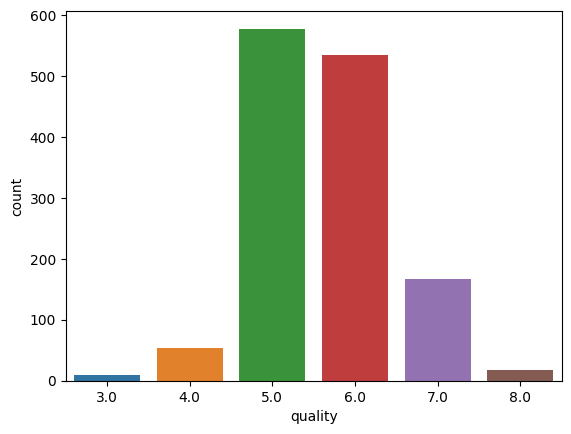

In [194]:
sns.countplot(df,x="quality")

<Axes: xlabel='quality', ylabel='alcohol'>

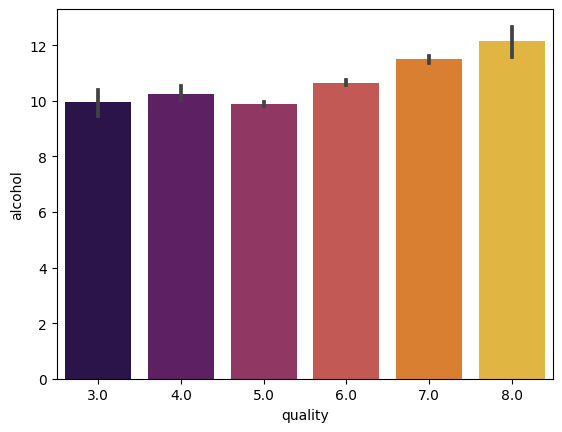

In [195]:
sns.barplot(df,x="quality",y="alcohol",palette="inferno")

<Axes: xlabel='citric acid', ylabel='pH'>

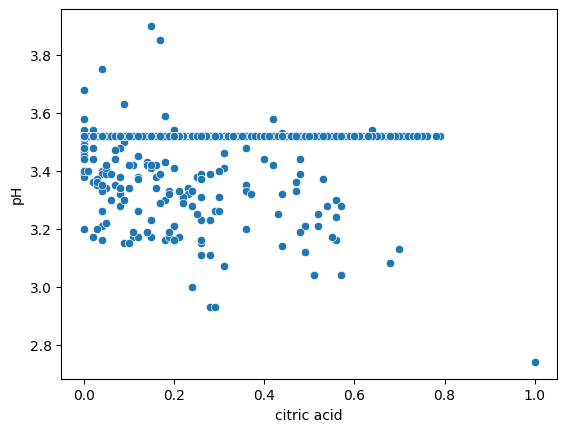

In [196]:
sns.scatterplot(data=df,x="citric acid",y="pH")

<Axes: >

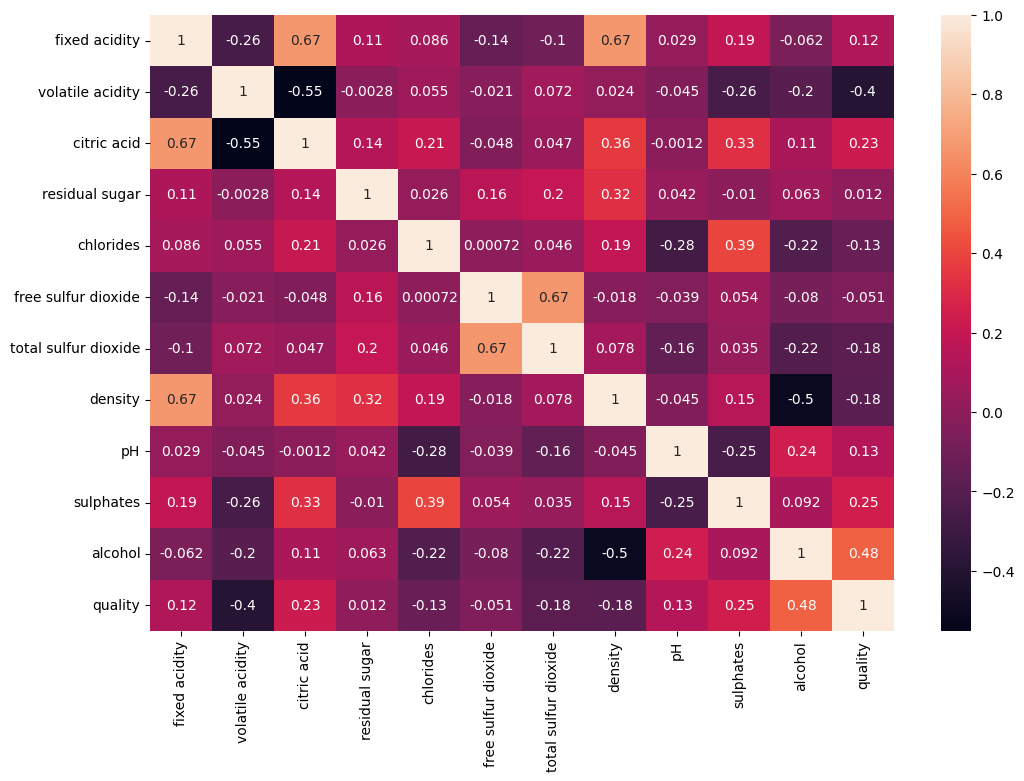

In [197]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [198]:
x = df.drop("quality",axis=True)
y = df.quality

In [199]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.52,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


In [200]:
y

0       5.0
1       5.0
2       5.0
3       6.0
5       5.0
       ... 
1593    6.0
1594    5.0
1595    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1360, dtype: float64

In [201]:
## over sampling
from imblearn.over_sampling import SMOTE
os = SMOTE(k_neighbors=1)
X,Y = os.fit_resample(x,y) 

In [202]:
Y.value_counts()

quality
5.0    578
6.0    578
7.0    578
4.0    578
8.0    578
3.0    578
Name: count, dtype: int64

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
x_tn, x_tt, y_tn, y_tt = train_test_split(X,Y,test_size=0.2, random_state=10)

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
sc = StandardScaler().fit(x_tn)

In [207]:
x_tn_std = sc.transform(x_tn)
x_tt_std = sc.transform(x_tt)

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [209]:
log = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Logistic Regression

In [210]:
log.fit(x_tn_std,y_tn)

LogisticRegression()

In [211]:
y_tp = log.predict(x_tt_std)

In [212]:
y_tp

array([5., 3., 7., 5., 7., 6., 8., 8., 3., 7., 4., 5., 8., 8., 7., 3., 3.,
       3., 8., 3., 8., 4., 6., 7., 8., 8., 8., 8., 6., 3., 7., 3., 8., 6.,
       3., 5., 6., 7., 3., 7., 5., 8., 3., 8., 3., 7., 4., 6., 4., 7., 7.,
       5., 3., 3., 4., 5., 8., 3., 4., 8., 8., 5., 5., 5., 5., 3., 6., 6.,
       3., 7., 7., 5., 8., 3., 8., 6., 6., 3., 4., 8., 3., 7., 3., 5., 3.,
       6., 8., 3., 6., 7., 8., 5., 8., 4., 5., 3., 8., 6., 6., 8., 8., 3.,
       4., 6., 5., 5., 7., 4., 5., 8., 4., 7., 4., 6., 8., 6., 8., 6., 8.,
       4., 5., 8., 4., 7., 3., 3., 5., 3., 8., 6., 4., 7., 4., 7., 3., 5.,
       4., 6., 8., 6., 8., 7., 8., 3., 3., 5., 8., 8., 8., 3., 6., 3., 3.,
       6., 4., 8., 3., 8., 6., 8., 7., 8., 5., 5., 7., 7., 5., 6., 3., 6.,
       5., 4., 4., 8., 3., 6., 6., 7., 3., 4., 3., 8., 7., 7., 4., 6., 3.,
       3., 6., 5., 6., 4., 4., 8., 8., 3., 5., 6., 6., 4., 4., 8., 7., 4.,
       3., 3., 7., 8., 5., 7., 4., 8., 4., 6., 7., 8., 8., 4., 5., 5., 8.,
       7., 3., 8., 7., 8.

In [213]:
metrics.accuracy_score(y_tt, y_tp)

0.6051873198847262

# Decision Tree

In [214]:
dt.fit(x_tn_std,y_tn)

DecisionTreeClassifier()

In [215]:
y_tp_dt = dt.predict(x_tt_std)

In [216]:
metrics.accuracy_score(y_tt, y_tp_dt)

0.7651296829971181

# Random Forest

In [217]:
rf.fit(x_tn_std,y_tn)

RandomForestClassifier()

In [218]:
y_tp_rf = rf.predict(x_tt_std)

In [219]:
metrics.accuracy_score(y_tt, y_tp_rf)

0.8256484149855908